In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as sm

%matplotlib inline

In /opt/continuum/anaconda/envs/anaconda201908_py37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /opt/continuum/anaconda/envs/anaconda201908_py37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /opt/continuum/anaconda/envs/anaconda201908_py37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as sm

%matplotlib inline

In [3]:
#Load dataset and convert it to a Pandas dataframe
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['target'] = boston.target

In [4]:
#Description of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
#Check the first five records
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
corr = df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [8]:
def calculate_pvalues(df):
    df = df.select_dtypes(include=['number'])
    pairs = pd.MultiIndex.from_product([df.columns, df.columns])
    pvalues = [pearsonr(df[a], df[b])[1] for a, b in pairs]
    pvalues = pd.Series(pvalues, index=pairs).unstack().round(4)
    return pvalues

# code adapted from https://stackoverflow.com/questions/25571882/pandas-columns-correlation-with-statistical-significance/49040342
def correlation_matrix(df,columns):
    rho = df[columns].corr()
    pval = calculate_pvalues(df[columns])
    # create three masks
    r0 = rho.applymap(lambda x: '{:.2f}'.format(x))
    r1 = rho.applymap(lambda x: '{:.2f}*'.format(x))
    r2 = rho.applymap(lambda x: '{:.2f}**'.format(x))
    r3 = rho.applymap(lambda x: '{:.2f}***'.format(x))
    # apply marks
    rho = rho.mask(pval>0.01,r0)
    rho = rho.mask(pval<=0.1,r1)
    rho = rho.mask(pval<=0.05,r2)
    rho = rho.mask(pval<=0.01,r3)
    return rho

columns = df.columns
correlation_matrix(df,columns)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.00***,-0.20***,0.41***,-0.06,0.42***,-0.22***,0.35***,-0.38***,0.63***,0.58***,0.29***,-0.39***,0.46***,-0.39***
ZN,-0.20***,1.00***,-0.53***,-0.04,-0.52***,0.31***,-0.57***,0.66***,-0.31***,-0.31***,-0.39***,0.18***,-0.41***,0.36***
INDUS,0.41***,-0.53***,1.00***,0.06,0.76***,-0.39***,0.64***,-0.71***,0.60***,0.72***,0.38***,-0.36***,0.60***,-0.48***
CHAS,-0.06,-0.04,0.06,1.00***,0.09**,0.09**,0.09*,-0.10**,-0.01,-0.04,-0.12***,0.05,-0.05,0.18***
NOX,0.42***,-0.52***,0.76***,0.09**,1.00***,-0.30***,0.73***,-0.77***,0.61***,0.67***,0.19***,-0.38***,0.59***,-0.43***
RM,-0.22***,0.31***,-0.39***,0.09**,-0.30***,1.00***,-0.24***,0.21***,-0.21***,-0.29***,-0.36***,0.13***,-0.61***,0.70***
AGE,0.35***,-0.57***,0.64***,0.09*,0.73***,-0.24***,1.00***,-0.75***,0.46***,0.51***,0.26***,-0.27***,0.60***,-0.38***
DIS,-0.38***,0.66***,-0.71***,-0.10**,-0.77***,0.21***,-0.75***,1.00***,-0.49***,-0.53***,-0.23***,0.29***,-0.50***,0.25***
RAD,0.63***,-0.31***,0.60***,-0.01,0.61***,-0.21***,0.46***,-0.49***,1.00***,0.91***,0.46***,-0.44***,0.49***,-0.38***
TAX,0.58***,-0.31***,0.72***,-0.04,0.67***,-0.29***,0.51***,-0.53***,0.91***,1.00***,0.46***,-0.44***,0.54***,-0.47***


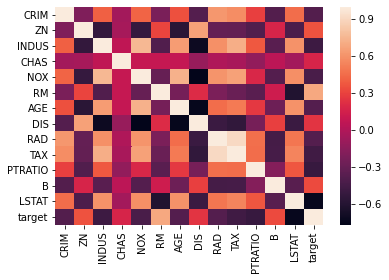

In [9]:
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

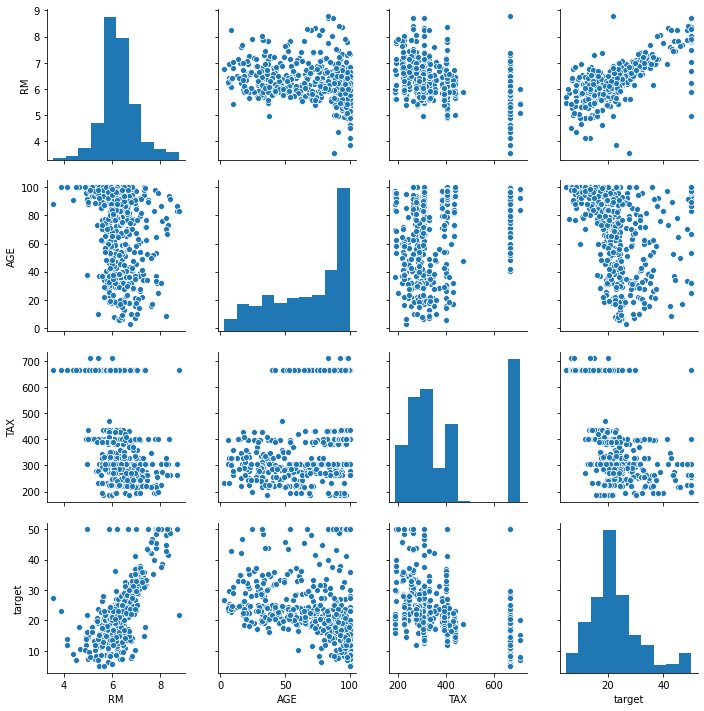

In [10]:
sns.pairplot(df[['RM', 'AGE', 'TAX', 'target']])

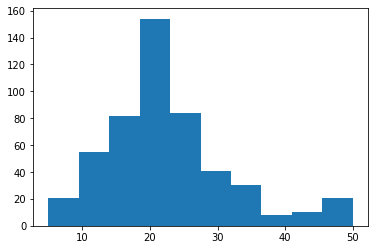

In [11]:
plt.hist(df['target'])
plt.show()

In [12]:
# Define features as X, target as y.
X = df.drop('target', axis='columns')
y = df['target']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [14]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# The intercept
print('Intercept: \n', regressor.intercept_)

# The coefficients
print('Coefficients: \n', pd.Series(regressor.coef_, index=X.columns, name='coefficients'))

Intercept: 
 36.93325545711978
Coefficients: 
 CRIM       -0.117735
ZN          0.044017
INDUS      -0.005768
CHAS        2.393416
NOX       -15.589421
RM          3.768968
AGE        -0.007035
DIS        -1.434956
RAD         0.240081
TAX        -0.011297
PTRATIO    -0.985547
B           0.008444
LSTAT      -0.499117
Name: coefficients, dtype: float64


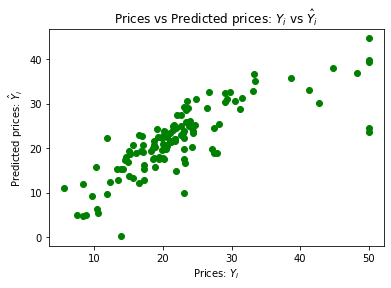

In [15]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Visualising the Test set results
# code adapted from https://joomik.github.io/Housing/
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, color='green')
ax.set(
    xlabel="Prices: $Y_i$",
    ylabel="Predicted prices: $\hat{Y}_i$",
    title="Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$",
)
plt.show()

In [16]:
# The mean squared error as a way to measure model performance.
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 29.78


In [17]:
model = sm.ols('target ~ AGE + B + CHAS + CRIM + DIS + INDUS + LSTAT + NOX + PTRATIO + RAD + RM + TAX + ZN', df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 09 Sep 2022   Prob (F-statistic):          6.72e-135
Time:                        08:49:29   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
B              0.0093      0.003      3.467      0.001       0.004       0.015
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
RM             3.8099      0.418      9.116      0.000       2.989       4.631
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# Feature Scaling
x = StandardScaler().fit_transform(X)

In [19]:
# Project data to 3 dimensions
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(
    data = principalComponents,
    columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf.head()

,principal component 1,principal component 2,principal component 3
0,-2.098297,0.773113,0.342943
1,-1.457252,0.591985,-0.695199
2,-2.074598,0.599639,0.167122
3,-2.611504,-0.006871,-0.100284
4,-2.458185,0.097712,-0.075348


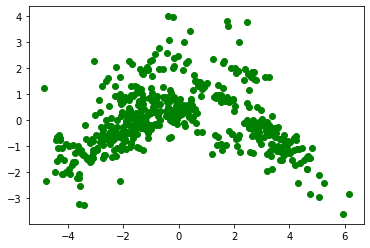

In [20]:
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], color ='green')
plt.show()

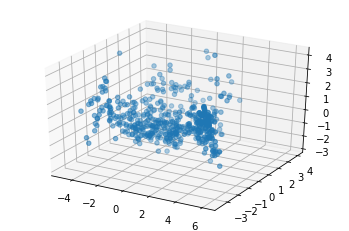

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'], principalDf['principal component 3'])
plt.show()

In [22]:
# Variance explained by each component
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.47129606, 0.11025193, 0.0955859 ])

In [23]:
sum(explained_variance)

0.6771338939748563

In [24]:
y_test_linear = y_test
y_pred_linear = y_pred
X = principalDf
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

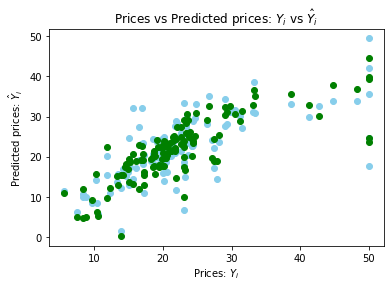

In [25]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, color='skyblue')
ax.scatter(y_test_linear, y_pred_linear, color = 'green')
ax.set(
    xlabel="Prices: $Y_i$",
    ylabel="Predicted prices: $\hat{Y}_i$",
    title="Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$",
)
plt.show()

In [26]:
print("Linear regression mean squared error: %.2f" % mean_squared_error(y_test_linear, y_pred_linear))
print("PCA mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Linear regression mean squared error: 29.78
PCA mean squared error: 43.50
